# **DSCI 100 Final Project**

**Section**: 004\
**Group**: 30\
**Members**: Victoria Chen (66263492), Saije Hans (73101313), Zhian Zhou (77230522), Charlotte Chen (60779865)

# <u> Introduction<u>

A research group in Computer Science at UBC has set up a MineCraft server to tackle the problem of predicting usage of a video game research server. By using the information in the given datasets - players.csv and sessions.csv - the following question can be answered: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

In this study, we aim to answer the question: Can played hours and age predict the value of subscription in players? generated by specifying the broad question above. Our dataset of choice is the players.csv table; this database contains information related to connecting player characteristics and subscriptions together which is required to answer our question. We have chosen three specific variables to use to reach a conclusion: played_hours, age, and subscribe. 

1. played_hours: gaming hours of each individual
2. age: age of individual players in years
3. subscribe: whether or not the individual is subscribed to a game related newspaper

The aim of our project is to propose a model that concludes whether or not the number of hours played on this server as well as the age of the individual playing can be used to determine if a player will subscribe to the newsletter. We chose to avoid predictors in the dataset that were not relevant to the exact characteristics we wanted to experiment with to evaluate if it contributed to the likelihood of subscribing or not. For instance, the dataset included the following in addition to the variables listed above: 

- hashed email
- player name
- player experience
- player gender

These were all excluded in our observations. Thus we believe that the played hours, age, and subscription values are the best fit to conclude if a player is subscribed or not. 

## Background

## Question

### Broad Question

> What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific Question

> Can `played_hours` and `Age` predict the value of `subscribe` in `players.csv`?

## Dataset Description

# <u>Methods & Results<u>

## 1. Loading Data

In [1]:
# Load tidyverse package
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Download and read dataset
download.file("https://raw.githubusercontent.com/vichen15/dsci100-004-30-final-project/refs/heads/main/players.csv", destfile = "players.csv")
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## 2. Wrangling Data

In [3]:
# Select relevant variables
players <- players |>
  select(
      Age, played_hours, subscribe
  )

In [4]:
# Factorize response variable
players <- players |>
  mutate(
    subscribe = factor(subscribe)
  )

In [5]:
# Remove NA values from data
players <- players |> 
  filter(!is.na(Age), !is.na(played_hours))

head(players)

Age,played_hours,subscribe
<dbl>,<dbl>,<fct>
9,30.3,TRUE
17,3.8,TRUE
17,0.0,FALSE
21,0.7,TRUE
21,0.1,TRUE
17,0.0,TRUE


## 3. Data Summary

In [6]:
# Calculate summary statistics for each variable
summary(players)

      Age         played_hours     subscribe  
 Min.   : 9.00   Min.   :  0.000   FALSE: 52  
 1st Qu.:17.00   1st Qu.:  0.000   TRUE :142  
 Median :19.00   Median :  0.100              
 Mean   :21.14   Mean   :  5.905              
 3rd Qu.:22.75   3rd Qu.:  0.600              
 Max.   :58.00   Max.   :223.100              

Using the `summary` command, we notice that:
- The most prevalent experience level of players is "Amateur", followed by "Veteran".
- The proportion of individuals subscribed to the newsletter is 144 / 196 = 73.47%.
- The average number of hours played is 5.846, yet the median is only 0.1.
- The mean (21.14) and median (19.00) ages are both approximately 20 years old.

## 4. Exploratory Visualization

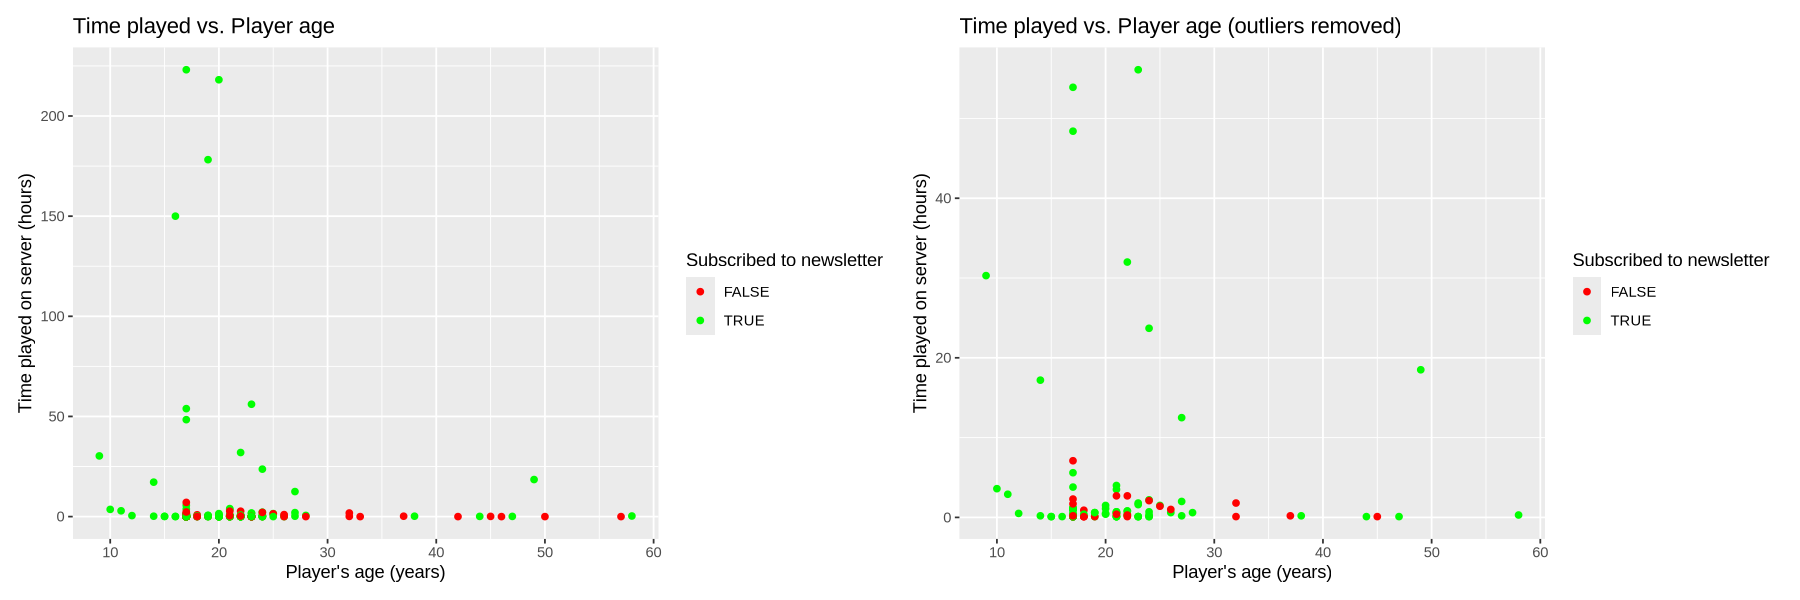

In [7]:
# Set-up
options(repr.plot.width = 15, repr.plot.height = 5)
library(patchwork)

# Remove NA values from data
players <- players |> 
  filter(!is.na(Age), !is.na(played_hours))

# Graph the relationship between time played, player age, and subscription status
time_age_1 <- players |>
  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Time played vs. Player age",
       x = "Player's age (years)", 
       y = "Time played on server (hours)",
       color = "Subscribed to newsletter") +
  scale_color_manual(values = c("red", "green"))

# Remove extreme outliers from the data
played_hours_trimmed <- players |>
  filter(played_hours <= 100) |>
  filter(played_hours > 0)

# Graph the relationship again with the trimmed data
time_age_2 <- played_hours_trimmed |>
  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Time played vs. Player age (outliers removed)",
       x = "Player's age (years)", 
       y = "Time played on server (hours)",
       color = "Subscribed to newsletter") +
  scale_color_manual(values = c("red", "green"))

# Print graphs side-by-side
time_age_1 + time_age_2

**Time played vs. Player age**
- We first started by creating a scatterplot by graphing `played_hours` against `Age`. We coloured the points red or green based on the value of `subscribe`.
- We found that almost all of the points were near zero on the y-axis and that more points were closer to zero on the x-axis as well.
- There were some high outliers of `played_hours` in this graph that made the rest of the values difficult to see.
- We were unable to make any conclusions from this graph.

**Time played vs. Player age (outliers removed)**
- To create this graph, we removed all points where `played_hours` exceeded 100 to get rid of the outliers.
- What we found after zooming in was that the majority of the data actually sat below 10 hours on the y-axis.
- we found that there was a cluster of points between 0-10 hours on the y-axis and between 10-30 years on the x-axis.

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_summary()`).”


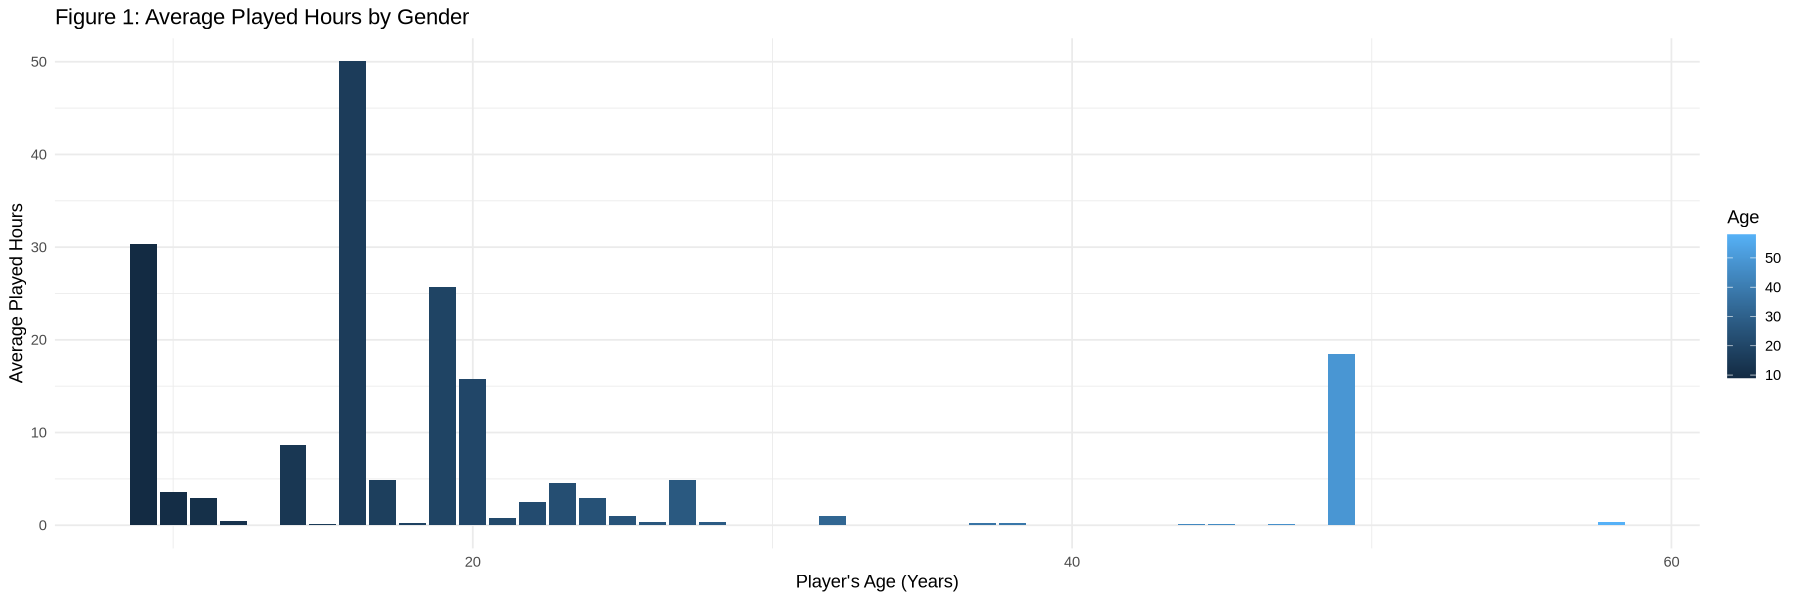

In [8]:
library(tidyverse)
table_1_data <- "players.csv"
table_1 <- read_csv(table_1_data)
table_1_tidy <- read_csv("players.csv") |>
  select(-hashedEmail, -name)
figure_1 <- ggplot(table_1_tidy, aes(x = Age, y = played_hours, fill = Age)) +
  geom_bar(stat = "summary", fun = "mean") +
  labs(
    x = "Player's Age (Years)",
    y = "Average Played Hours",
    title = "Figure 1: Average Played Hours by Gender"
  ) +
  theme_minimal()
figure_1

## 5. Data Analysis

In [9]:
set.seed(2025)
library(rsample)
library(tidyverse) 
library(tidymodels)

#players


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [10]:
players_split <- initial_split(players, prop = 0.75 , strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)


In [11]:
#find best k
players_recipe <- recipe(subscribe ~ ., data = players) |>   
step_scale(all_predictors()) |>   
step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>   
set_engine("kknn") |>   
set_mode("classification")

players_vfold <- vfold_cv(players, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))


knn_results <- workflow() |>   
add_recipe(players_recipe) |>   
add_model(knn_spec) |>   
tune_grid(resamples = players_vfold, grid = k_vals) |>   
collect_metrics()


accuracies <- knn_results |>   
filter(.metric == "accuracy")

best_k <- accuracies |>         
arrange(desc(mean)) |>         
head(1) |>         
pull(neighbors) 

best_k


[1] 6

In [12]:
#train new model with the best k
knn_new_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6)|>   
set_engine("kknn") |>   
set_mode("classification")

knn_fit <- workflow() |>   
add_recipe(players_recipe) |>   
add_model(knn_new_spec) |>   
fit(data = players_train)

players_test_predictions <- predict(knn_fit, players_test) |>   
bind_cols(players_test)

accuracy <- players_test_predictions|>
metrics(truth = subscribe, estimate = .pred_class) |>   
filter(.metric == "accuracy")

accuracy


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6122449


In [13]:
#check level
level <- players_test_predictions |> 
pull(subscribe) |> 
levels()

level


[1] "FALSE" "TRUE"

In [14]:
#precision
precision <- players_test_predictions|>
precision(truth = subscribe, estimate = .pred_class, event_level = "second")
precision


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7931034


In [15]:
#recall
recall <- players_test_predictions|>
recall(truth = subscribe, estimate = .pred_class, event_level = "second")
recall


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.6388889


In [16]:
#confusion
confusion <- players_test_predictions |>              
conf_mat(truth = subscribe, estimate = .pred_class) 
confusion


          Truth
Prediction FALSE TRUE
     FALSE     7   13
     TRUE      6   23

## 6. Analysis Visualization

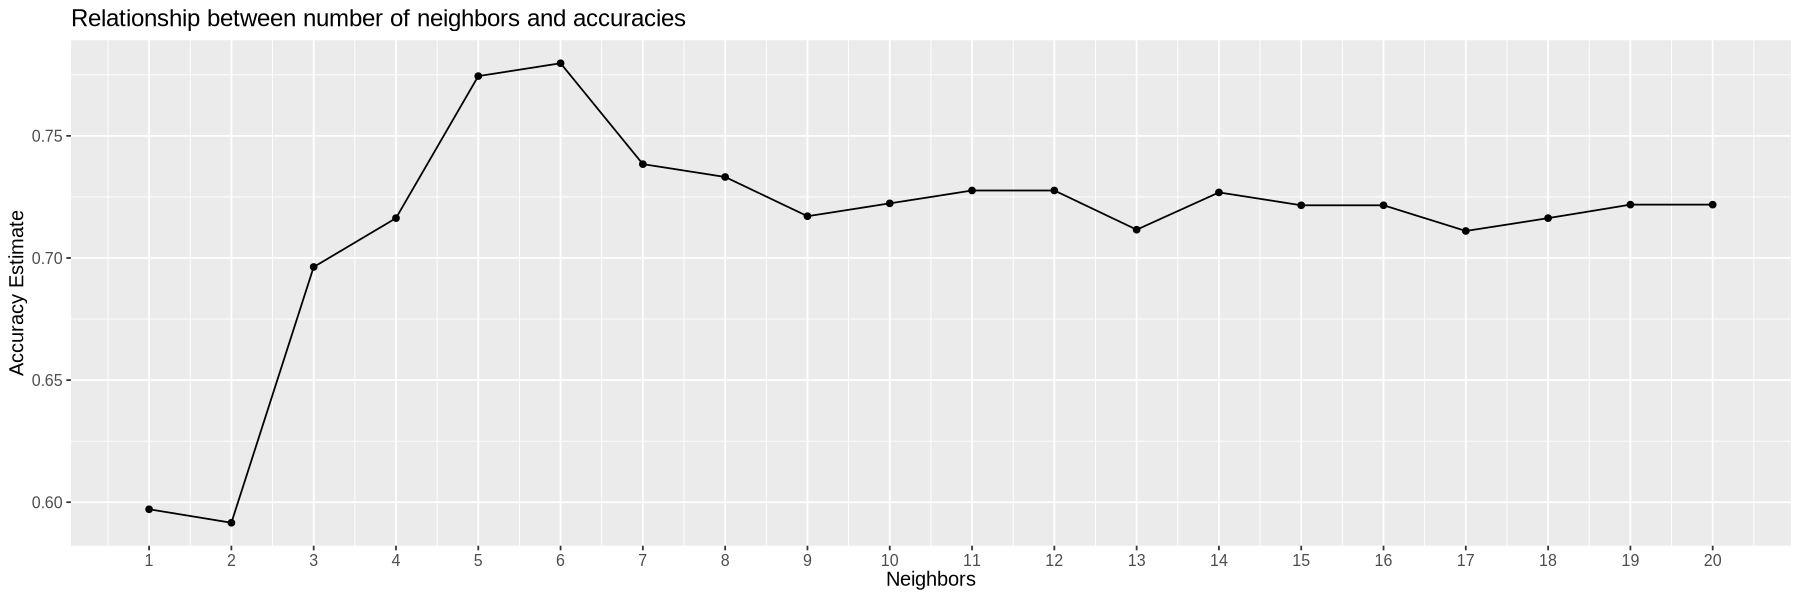

In [17]:
#visulize accuracy for different k using cross validation 
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +   
geom_point() +   
geom_line() +   
labs(x = "Neighbors", y = "Accuracy Estimate") +
ggtitle("Relationship between number of neighbors and accuracies")+
#xlim(c(1,20))+
scale_x_continuous(breaks = 1:20)+
theme(text = element_text(size = 12))

accuracy_vs_k


In [19]:
predict_result <- ggplot(players_test_predictions, aes(x = Age, y = played_hours, color = .pred_class))|>
geom_point() +   
geom_line() +   
labs(x = "", y = "Accuracy Estimate") +
ggtitle("Relationship between number of neighbors and accuracies")+
#xlim(c(1,20))+
scale_x_continuous(breaks = 1:20)+
theme(text = element_text(size = 12))

players_test_predictions


.pred_class,Age,played_hours,subscribe
<fct>,<dbl>,<dbl>,<fct>
FALSE,47,0.1,TRUE
TRUE,23,1.6,TRUE
TRUE,28,0.6,TRUE
FALSE,18,0.1,FALSE
FALSE,33,0.0,FALSE
TRUE,20,0.4,TRUE
TRUE,25,1.4,FALSE
FALSE,17,5.6,TRUE
TRUE,17,0.1,TRUE


# <u>Discussion<u>

## Summary

In this group project, we aim to explore whether a player’s age and their total playtime can be used to predict their likelihood of subscribing to a game-related newspaper. First, we download and read the dataset `players.csv`. After cleaning the data by selecting relevant variables and removing NA values, we calculate summary statistics for `Age`, `played_hours` and `subscribe`. Next, we visualize the relationships between time played, player's age and subscription status. The exploratory analysis reveals a heavily right-skewed distribution of players' total playtime, since the majority of players record very low playtime, often close to zero hours, and only a small number of them contribute extremely high playtime. In addition to that, age also shows little visible relationship with either playtime or subscription status. Then we train a k-nearest neighbors classification model. Our results show that the model achieves a test accuracy of approximately 61%, with a precision of 79% and a recall of 64%. Overall, the model is able to capture some relationships in the data but struggles to reliably distinguish subscribers from non-subscribers. While a player's age and their total playtime contain some information related to subscription behavior, they do not provide very strong predictive power.

## Expectations vs. Results

Before conducting the analysis, we expected to find the relationship between a player’s age, their total playtime and their likelihood of subscribing to a game-related newspaper. We assumed that players who spent more time playing the game would be more engaged in games overall. Therefore, they were more likely to subscribe to a game-related newspaper. Similarly, we expected age to also have a significant impact on this. Perhaps older players were more consistent gamers, so they would subscribe to a game-related newspaper. These assumptions shaped our initial hypothesis that both age and total playtime would help distinguish subscribers from non-subscribers.

However, the results do not fully support our expectations. The exploratory visualizations show that total playtime is extremely right-skewed, with most players recording very short playtime. Because of this, there is not enough variation in the data to form strong patterns that can separate subscribers from non-subscribers. Additionally, age do not show a clear and strong relationship with respect to subscription status as well. We can see that players of all ages cluster near the low playtime values. These findings suggest that the predictors we choose may not be very effective in predicting a player's subscription status. The performance of our k-nearest neighbors classification model confirm these observations. While the model achieves a relatively high precision of nearly 80%, its accuracy and recall are noticeably low. To conclude, the results highlight that the predictive power of age and playtime in predicting subscription status is limited.

## Impact

## Future Questions

This project makes us consider other directions for future exploration. One important direction for future work is to explore how the model’s accuracy can be improved. Since age and total playtime show only weak relationships with the subscription status, it will be valuable to investigate whether adding additional predictors can strengthen the model. For instance, the `players.csv` dataset also contains information such as experience level and gender, which may reveal more meaningful relationships with the subscription status. We can take advantage of information in the `sessions.csv` dataset as well. These additional predictors may make a difference to our k-nearest neighbors model.

Another direction of exploration is to try to apply different modeling techniques. The model we use in the project is k-nearest neighbors classification model, which is simple but may not be suitable for imbalanced datasets or weakly structured predictors. Our future work can involve training other models that are more flexible. Comparing multiple models can help uncover which prediction methods are most reliable for this project, potentially leading to better predictions.

In conclusion, the future work should focus on identifying richer features and more suitable models to achieve higher predictive accuracy and recall, better capturing the factors that influence whether players subscribe to a game-related newspaper.

# <u>References<u>